In [2]:
#imported librearies
import pandas as pd
import numpy as np
import scikitplot as skplt
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,confusion_matrix

In [3]:
data = pd.read_csv("C:/Users/HP/Downloads/Kaggle/loan/data.csv")

In [4]:
data.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [5]:
#to find number of missing values
data.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [6]:
#as loan_id is not a relevant feature it must be dropped.
data = data.drop(columns = ['Loan_ID'], axis = 1)

In [7]:
#imputed missing values of both continuous and categorical variables
from sklearn.impute import SimpleImputer
mean_imputer = SimpleImputer(strategy='mean')
data[['LoanAmount']] = mean_imputer.fit_transform(data[['LoanAmount']])
mode_imputer = SimpleImputer(strategy='most_frequent')
data[['Gender']] = mode_imputer.fit_transform(data[['Gender']])
data[['Loan_Amount_Term']] = mode_imputer.fit_transform(data[['Loan_Amount_Term']])
data[['Credit_History']] = mode_imputer.fit_transform(data[['Credit_History']])
data[['Married']] = mode_imputer.fit_transform(data[['Married']])
data[['Dependents']] = mode_imputer.fit_transform(data[['Dependents']])
data[['Self_Employed']] = mode_imputer.fit_transform(data[['Self_Employed']])

In [8]:
#Checked again if some missing value left
data.isnull().sum()

Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#To check the distribution of values 
data['Loan_Amount_Term'].value_counts()

360.0    526
180.0     44
480.0     15
300.0     13
84.0       4
240.0      4
120.0      3
36.0       2
60.0       2
12.0       1
Name: Loan_Amount_Term, dtype: int64

In [10]:
#label encoded all categorical data
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
data['Loan_Status'] = le.fit_transform(data['Loan_Status'])
data['Gender'] = le.fit_transform(data['Gender'])
data['Credit_History'] = le.fit_transform(data['Credit_History'])
data['Self_Employed'] = le.fit_transform(data['Self_Employed'])
data['Married'] = le.fit_transform(data['Married'])
data['Education'] = le.fit_transform(data['Education'])

In [11]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,Urban,1
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,Rural,0
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,Urban,1
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,Urban,1
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,Urban,1


In [12]:
#stored the target in y varibale
y = data['Loan_Status']
data = data.drop(columns = ['Loan_Status'], axis = 1)

In [13]:
data.head()

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0,5849,0.0,146.412162,360.0,1,Urban
1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1,Rural
2,1,1,0,0,1,3000,0.0,66.000000,360.0,1,Urban
3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1,Urban
4,1,0,0,0,0,6000,0.0,141.000000,360.0,1,Urban


In [14]:
#Property_Area and Dependents column is one hot encoded
ohe = pd.get_dummies(data['Dependents'], prefix='Dependents')
data = pd.concat([data, ohe], axis=1)
ohe1 = pd.get_dummies(data['Property_Area'], prefix='Property_Area')
data = pd.concat([data, ohe1], axis=1)
data = data.drop(columns = ['Dependents', 'Property_Area'], axis = 1)

In [15]:
#Typecasted dataframe values to int data type
data = data.astype(int)
data = data.rename(columns={'Dependents_3+':'Dependents_3'})

In [16]:
data.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Dependents_0,Dependents_1,Dependents_2,Dependents_3,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,5849,0,146,360,1,1,0,0,0,0,0,1
1,1,1,0,0,4583,1508,128,360,1,0,1,0,0,1,0,0
2,1,1,0,1,3000,0,66,360,1,1,0,0,0,0,0,1
3,1,1,1,0,2583,2358,120,360,1,1,0,0,0,0,0,1
4,1,0,0,0,6000,0,141,360,1,1,0,0,0,0,0,1


In [17]:
#Splitted the dataset to test and train
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, y, train_size=0.8, random_state = 5)

Accuracy of Random_Forest:  80.48780487804879
F1 score: 0.8681


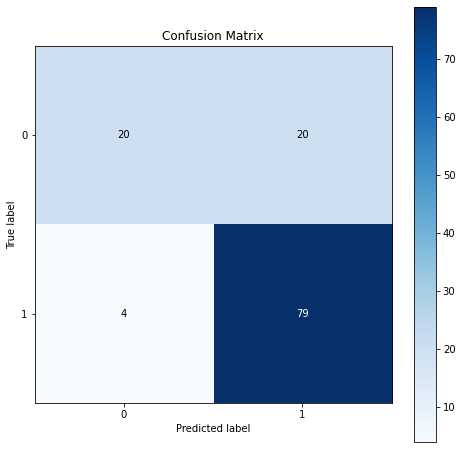

In [19]:
#model1
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
rf.fit(X=X_train, y=y_train)
acc = rf.score(X_test, y_test)
print("Accuracy of Random_Forest: ",acc*100)
rf_pred = rf.predict(X_test)
print('F1 score: %0.4f'%f1_score(y_test, rf_pred))
skplt.metrics.plot_confusion_matrix(y_test, rf_pred,
        figsize=(8,8))

Accuracy of Gradient Boost 75.60975609756098
F1 score: 0.8315


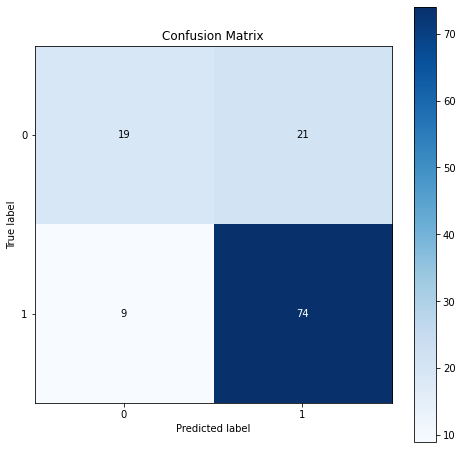

In [20]:
#model2
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(n_estimators=134,learning_rate=0.2)
gb.fit(X_train, y_train)
accuracy2 = gb.score(X_test, y_test)
print("Accuracy of Gradient Boost", accuracy2*100)
gb_pred = gb.predict(X_test)
print('F1 score: %0.4f'%f1_score(y_test, gb_pred))
skplt.metrics.plot_confusion_matrix(y_test, gb_pred,
        figsize=(8,8))

In [21]:
#model1 has higher f1 score than model2, so we will select model1.
#dumped model1 to binary format.
import pickle
file = open('C:/Users/HP/Downloads/Kaggle/loan/loan_approval.pkl', 'wb')
pickle.dump(rf, file)